In [1]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.nn.functional as F
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import transformers
from transformers import AutoModel, BertTokenizerFast
from transformers import RobertaTokenizer, RobertaModel
from tqdm.notebook import tqdm_notebook
# from matplotlib import style
import random
import pickle
# style.use("dark_background")
seed_val = 994
random.seed(seed_val)
np.random.seed(seed_val)
torch.manual_seed(seed_val)
torch.cuda.manual_seed_all(seed_val)
device=torch.device("cuda")


# import wandb

# wandb.init(project="my-test-project", entity="prakhar24")

In [2]:
# %history
train_df=pd.read_csv("./MELD/data/MELD/train_sent_emo.csv")
val_df=pd.read_csv("./MELD/data/MELD/dev_sent_emo.csv")
test_df=pd.read_csv("./MELD/data/MELD/test_sent_emo.csv")


train_df.head()

# file = open("IEMOCAP_features_bert.pkl",'rb')
# object_file = pickle.load(file)
# file.close()

,Sr No.,Utterance,Speaker,Emotion,Sentiment,Dialogue_ID,Utterance_ID,Season,Episode,StartTime,EndTime
0,1,also I was the point person on my company’s tr...,Chandler,neutral,neutral,0,0,8,21,"00:16:16,059","00:16:21,731"
1,2,You must’ve had your hands full.,The Interviewer,neutral,neutral,0,1,8,21,"00:16:21,940","00:16:23,442"
2,3,That I did. That I did.,Chandler,neutral,neutral,0,2,8,21,"00:16:23,442","00:16:26,389"
3,4,So let’s talk a little bit about your duties.,The Interviewer,neutral,neutral,0,3,8,21,"00:16:26,820","00:16:29,572"
4,5,My duties? All right.,Chandler,surprise,positive,0,4,8,21,"00:16:34,452","00:16:40,917"


/mnt/berry/home/prakhar/dgl/dgl/lib/python3.8/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


<AxesSubplot:>

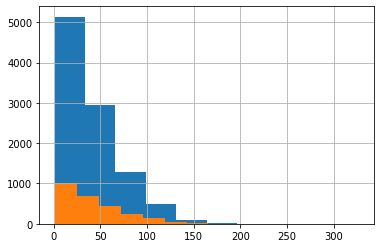

In [3]:

mapping ={'neutral':0, 'surprise':1, 'fear':2, 'sadness':3, 'joy':4, 'disgust':5, 'anger':6}

mapping2={"Chandler":0,"Phoebe":1,"Monica":2,"Ross":3,"Joey":4,"Rachel":5}

train_df=train_df.replace({"Emotion":mapping})# mapping labels to integer
val_df=val_df.replace({"Emotion":mapping})
test_df=test_df.replace({"Emotion":mapping})

train_df=train_df.replace({"Speaker":mapping2})# mapping labels to integer
val_df=val_df.replace({"Speaker":mapping2})
test_df=test_df.replace({"Speaker":mapping2})

for i,dat in train_df.iterrows():
    if isinstance(dat["Speaker"],str):
        train_df["Speaker"].iloc[i]=-1

for i,dat in test_df.iterrows():
    if isinstance(dat["Speaker"],str):
        test_df["Speaker"].iloc[i]=-1
        
for i,dat in val_df.iterrows():
    if isinstance(dat["Speaker"],str):
        val_df["Speaker"].iloc[i]=-1

train_text=train_df["Utterance"].tolist()
val_text=val_df["Utterance"].tolist()
test_text=test_df["Utterance"].tolist()


train_labels=train_df["Emotion"]
val_labels=val_df["Emotion"]
test_labels=test_df["Emotion"]

train_dia_id=train_df["Dialogue_ID"].tolist()
val_dia_id=val_df["Dialogue_ID"].tolist()
test_dia_id=test_df["Dialogue_ID"].tolist()


train_speaker=torch.tensor(train_df["Speaker"].tolist())
val_speaker=torch.tensor(val_df["Speaker"].tolist())
test_speaker=torch.tensor(test_df["Speaker"].tolist())

# print(train_text,train_labels)

len_train=[len(j) for j in train_text]
len_test=[len(i) for i in test_text]

pd.Series(len_train).hist()
pd.Series(len_test).hist()

# print(train_df.Speaker.value_counts())




In [4]:
# print(train_text[6])
print(train_df["Dialogue_ID"].unique())

# print(train_speaker)
print(len(train_dia_id))

[   0    1    2 ... 1036 1037 1038]
9989


In [58]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
tokenizer = AutoTokenizer.from_pretrained('roberta-large')
bert = AutoModel.from_pretrained('roberta-large')

Some weights of the model checkpoint at roberta-large were not used when initializing RobertaModel: ['lm_head.decoder.weight', 'lm_head.layer_norm.weight', 'lm_head.layer_norm.bias', 'lm_head.bias', 'lm_head.dense.bias', 'lm_head.dense.weight']
- This IS expected if you are initializing RobertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [59]:
dia_text_train=[]
temp=[]
for i in train_dia_id:
    if flag

['Now you’ll be heading a whole division, so you’ll have a lot of duties.', 'I see.', 'But there’ll be perhaps 30 people under you so you can dump a certain amount on them.', 'Good to know.', 'We can go into detail', 'No don’t I beg of you!', 'All right then, we’ll have a definite answer for you on Monday, but I think I can say with some confidence, you’ll fit in well here.', 'Really?!', 'Absolutely.  You can relax', 'But then who? The waitress I went out with last month?'] [0, 0, 0, 0, 0, 0, 0, 0, 0, 1]


In [62]:
# abc=[["u1","u2","u3"],["u1","u2","u3"],["u1","u2","u3"]]
p_w=3 #past window
# print(train_text)
train_text_list=[]
train_ids=[]
print(train_ids)
train_mask=[]
print((train_text[-1]))
print("lann")
start=0
end=0
# token_abc=tokenizer(abc)
for i,(txt,did) in enumerate(zip(train_text,train_dia_id)):
#     if i<=p_w or did[i]==did[i+1]:
    if i<=p_w:
        print()
        start=i
        train_text_list.append(train_text[:i+1])
        tokens_train=tokenizer(train_text[:i+1],
                                         max_length=80,
                                         padding=True,
                                         truncation=True)
        train_ids.append(torch.tensor(tokens_train["input_ids"]))
        train_mask.append(torch.tensor(tokens_train["attention_mask"]))
        
    else:
        train_text_list.append(train_text[i-p_w:i+1])
        tokens_train=tokenizer(train_text[i-p_w:i+1],
                                         max_length=80,
                                         padding=True,
                                         truncation=True)
        train_ids.append(torch.tensor(tokens_train["input_ids"]))
        train_mask.append(torch.tensor(tokens_train["attention_mask"]))
        
# print((train_ids))
    
    

[]
That was a good one. For a second there, I was like, "whoa."
lann






In [61]:

test_text_list=[]
test_ids=[]

test_mask=[]

for i,(txt,did) in enumerate(zip(test_text,test_dia_id)):
    if i<=p_w:
        test_text_list.append(test_text[:i+1])
        tokens_test=tokenizer(test_text[:i+1],
                                         max_length=80,
                                         padding=True,
                                         truncation=True)
        test_ids.append(torch.tensor(tokens_test["input_ids"]))
        test_mask.append(torch.tensor(tokens_test["attention_mask"]))
        
    else:
        test_text_list.append(test_text[i-p_w:i+1])
        tokens_test=tokenizer(test_text[i-p_w:i+1],
                                         max_length=80,
                                         padding=True,
                                         truncation=True)
        test_ids.append(torch.tensor(tokens_test["input_ids"]))
        test_mask.append(torch.tensor(tokens_test["attention_mask"]))
        
# print((test_ids))
    

In [26]:
print(tokenizer.decode(train_ids[1][1]))

<s>You must’ve had your hands full.</s><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad>


In [27]:

val_text_list=[]
val_ids=[]

val_mask=[]
for i,(txt,did) in enumerate(zip(val_text,val_dia_id)):
    if i<=p_w:
        val_text_list.append(val_text[:i+1])
        tokens_val=tokenizer(val_text[:i+1],
                                         max_length=80,
                                         padding=True,
                                         truncation=True)
        val_ids.append(torch.tensor(tokens_val["input_ids"]))
        val_mask.append(torch.tensor(tokens_val["attention_mask"]))
        
    else:
        val_text_list.append(val_text[i-p_w:i+1])
        tokens_val=tokenizer(val_text[i-p_w:i+1],
                                         max_length=80,
                                         padding=True,
                                         truncation=True)
        val_ids.append(torch.tensor(tokens_val["input_ids"]))
        val_mask.append(torch.tensor(tokens_val["attention_mask"]))

In [20]:
# train_speaker=train_speaker.tolist()
# test_speaker=test_speaker.tolist()
print(val_ids)

[tensor([[   0, 7516,  127, 1840,    6,   37,   17,   27,   29,  685,   24,    4,
           91,   17,   27,   29, 4940,  685,   24,    4,    2]]), tensor([[   0, 7516,  127, 1840,    6,   37,   17,   27,   29,  685,   24,    4,
           91,   17,   27,   29, 4940,  685,   24,    4,    2],
        [   0, 2264,  116,    2,    1,    1,    1,    1,    1,    1,    1,    1,
            1,    1,    1,    1,    1,    1,    1,    1,    1]]), tensor([[    0,  7516,   127,  1840,     6,    37,    17,    27,    29,   685,
            24,     4,    91,    17,    27,    29,  4940,   685,    24,     4,
             2,     1,     1,     1],
        [    0,  2264,   116,     2,     1,     1,     1,     1,     1,     1,
             1,     1,     1,     1,     1,     1,     1,     1,     1,     1,
             1,     1,     1,     1],
        [    0, 11094,   328,  1793,     6,    52,   115,   213,     7,     5,
           827,     6,   593,    84,  2349,     8,   847,   106,   160,    23,
          

In [55]:
speaker_list_train=[]
speaker_list_test=[]
speaker_list_val=[]
for i,speak in enumerate(train_speaker):
    if i<=p_w:
        print()
#         speaker_list_train.append(train_speaker[:i+1])
    else:
        speaker_list_train.append(train_speaker[i-p_w:i+1])
# print(len(speaker_list[4]))        

for i,speak in enumerate(test_speaker):
    if i<=p_w:
        speaker_list_test.append(test_speaker[:i+1])
    else:
        speaker_list_test.append(test_speaker[i-p_w:i+1])
        
for i,speak in enumerate(val_speaker):
    if i<=p_w:
        speaker_list_val.append(val_speaker[:i+1])
    else:
        speaker_list_val.append(val_speaker[i-p_w:i+1])

In [ ]:
# tokens_train=tokenizer(train_text,
#                                          max_length=80,
#                                          padding=True,
#                                          truncation=True)

# tokens_val=tokenizer(val_text,
#                                          max_length=80,
#                                          padding=True,
#                                          truncation=True)

# tokens_test=tokenizer(test_text,
#                                          max_length=80,
#                                          padding=True,
#                                          truncation=True)

print(len(val_text))

In [29]:
# train_seq=torch.tensor(tokens_train["input_ids"])
# train_mask=torch.tensor(tokens_train["attention_mask"])
train_labels=torch.tensor(train_labels.tolist()).to(device)

# val_seq=torch.tensor(tokens_val["input_ids"])
# val_mask=torch.tensor(tokens_val["attention_mask"])
val_labels=torch.tensor(val_labels.tolist()).to(device)

# test_seq=torch.tensor(tokens_test["input_ids"])
# test_mask=torch.tensor(tokens_test["attention_mask"])
test_labels=torch.tensor(test_labels.tolist()).to(device)

In [17]:
# from torch.utils.data import DataLoader,TensorDataset,RandomSampler, SequentialSampler
# batch_size=32

# train_data=TensorDataset(train_ids,train_mask,train_label)
# train_sampler=SequentialSampler(train_data)
# train_dataloader=DataLoader(train_data,sampler=train_sampler,batch_size=batch_size)

# val_data=TensorDataset(val_seq,val_mask,val_label)
# val_sampler=SequentialSampler(val_data)
# val_dataloader=DataLoader(val_data,sampler=val_sampler,batch_size=batch_size)

# test_data=TensorDataset(test_seq,test_mask,test_label)
# print(len(test_data[0][0]))
# test_sampler=SequentialSampler(test_data)
# test_dataloader=DataLoader(test_data,sampler=test_sampler,batch_size=batch_size)
# print(len(test_dataloader))

In [18]:

print(type(train_speaker))
# modules=[bert.encoder.layer[:1]]
# for module in modules:
#     for param in module.parameters():
#         param.requires_grad=False

# for name, param in list(bert.named_parameters())[:-79]: 
#     print('I will be frozen: {}'.format(name)) 
#     param.requires_grad = False


<class 'torch.Tensor'>


In [30]:
# from torch.utils.data import DataLoader,TensorDataset,RandomSampler, SequentialSampler
# batch_size=32

# train_data=TensorDataset(train_ids,train_mask,train_label)
# train_sampler=SequentialSampler(train_data)
# train_dataloader=DataLoader(train_data,sampler=train_sampler,batch_size=batch_size)

# val_data=TensorDataset(val_seq,val_mask,val_label)
# val_sampler=SequentialSampler(val_data)
# val_dataloader=DataLoader(val_data,sampler=val_sampler,batch_size=batch_size)

# test_data=TensorDataset(test_seq,test_mask,test_label)
# print(len(test_data[0][0]))
# test_sampler=SequentialSampler(test_data)
# test_dataloader=DataLoader(test_data,sampler=test_sampler,batch_size=batch_size)
# print(len(test_dataloader))

In [31]:
model_rob = RobertaModel.from_pretrained('roberta-large')
model_rob=model_rob.to(device)
def roberta_emb(word):
#     print(word)
    tokens=tokenizer(word,
                     return_tensors="pt")
    tokens=tokens.to(device)
#     print(tokens)
    emb=model_rob(**tokens)
#     print(model.device)
#     print(emb.pooler_output[0].shape)
    return emb.pooler_output[0]
    
# roberta_emb("no!")    

Some weights of the model checkpoint at roberta-large were not used when initializing RobertaModel: ['lm_head.decoder.weight', 'lm_head.layer_norm.weight', 'lm_head.layer_norm.bias', 'lm_head.bias', 'lm_head.dense.bias', 'lm_head.dense.weight']
- This IS expected if you are initializing RobertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [32]:
# import nltk
# nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# train_speaker=train_speaker[1:]
def senti_word_emb(sentence_list):
    decoded=[]
    emb=[]
    loca=[]
    sentiment=[]
    sia = SentimentIntensityAnalyzer()
    
    for y,z in enumerate(sentence_list):

        max_val=0
        sentiment.clear()
        sent=tokenizer.decode(z)
#         print(sent)
        word_list=sent.split()

        
        
        for i in word_list:
            a=sia.polarity_scores(i)
        
            if max_val<abs(a["compound"]):
                max_val=abs(a["compound"])
            
            sentiment.append(abs(a["compound"]))
#         print(sentiment)
    
        if max_val>0.2:
    
            emb.append(roberta_emb(word_list[sentiment.index(max(sentiment))]).tolist())
            loca.append(y)
        
        
    return emb,loca
#     word_list=sentence.split()
# #     print(word_list)

#     for i in word_list:
#         a=sia.polarity_scores(i)
#         if max_val<abs(a["compound"]):
#             max_val=abs(a["compound"])
            
#         sentiment.append(abs(a["compound"]))
# #     print(sentiment) 
# #     print(sentiment.index(max(sentiment)))
#     if max_val>0.2:
    
#         emb=roberta_emb(word_list[sentiment.index(max(sentiment))])
# #         print(emb)
#         return emb
#     else:
#         return None
    
#     print(a)    
# print(train_ids[7])
# print(train_text[7])
# print(senti_word_emb((train_text[7]))) 
# # print((tokenizer.decode(train_ids[7][3])))
# print(senti_word_emb(tokenizer.decode(train_ids[7][3])))  
# print(torch.equal(senti_word_emb((train_text[7])),senti_word_emb(tokenizer.decode(train_ids[7][3]))))
senti_word_emb(train_ids[15])

([[0.1538991630077362,
   0.6990387439727783,
   0.42726385593414307,
   -0.6813342571258545,
   0.7148380279541016,
   -0.8823007345199585,
   -0.7232259511947632,
   -0.2550550699234009,
   -0.13615573942661285,
   0.20646382868289948,
   -0.9012773036956787,
   -0.3831064999103546,
   -0.23501797020435333,
   -0.6771948933601379,
   -0.5903666019439697,
   -0.3973999321460724,
   0.4209534525871277,
   0.3412456214427948,
   -0.7445448040962219,
   -0.7308454513549805,
   -0.6709631681442261,
   0.566565752029419,
   -0.002156093716621399,
   0.10377741605043411,
   -0.7117859125137329,
   -0.11521252989768982,
   -0.2349322885274887,
   -0.2918424904346466,
   0.793727695941925,
   -0.7912036180496216,
   0.7444596290588379,
   0.350535124540329,
   -0.05552651360630989,
   0.3417344391345978,
   -0.029569145292043686,
   -0.5825620889663696,
   -0.22719824314117432,
   0.22385002672672272,
   0.08316504955291748,
   0.2993084192276001,
   0.2563855051994324,
   0.3734108507633209,

In [33]:
import dgl
from dgl.nn import GraphConv
import graph4nlp
print([i for i in range(3)])

Using backend: pytorch[14:17:44] /opt/dgl/src/runtime/tensordispatch.cc:43: TensorDispatcher: dlopen failed: /mnt/berry/home/prakhar/dgl/dgl/lib/python3.8/site-packages/dgl/tensoradapter/pytorch/libtensoradapter_pytorch_1.10.0.so: cannot open shared object file: No such file or directory



[0, 1, 2]


In [34]:
def make_graph(embed,text_ids,speakers):
    if len(embed)> (3):
        
#         u,v=torch.tensor([0,1,2]),torch.tensor([1,2,3])
        u,v=[0,1,2],[1,2,3]
#         k=[0,1,2,3,4,5]

#         emb=[]
#         loca=[]
        emb,loca=senti_word_emb(text_ids)
#         for loc,txt in enumerate(text):
#             if senti_word_emb(txt)!=None:
#                 emb.append(senti_word_emb(txt).tolist())
#                 loca.append(loc)
#                 print(txt)
#         print("lcoa before pop",loca)
#         print("speakers before pop",speakers)
        speakers=speakers.tolist()

        for j,z in reversed(list(enumerate(loca))):
            if speakers[z]==-1:         
#                 print("j",j)                               #reverse before poppong for correct index
#                 remove_index.append(j)
                loca.pop(j)
                emb.pop(j)
        
#         print("loca afer pop",loca)
#         print("speakers",speakers)
        k=[]
        speaker_node=[]
        for idx in range(3+1):
#             if isinstance(speakers[idx],int):
            if speakers[idx]!=-1:
                k.append(idx)
                speaker_node.append(speakers[idx])
#         print("before k spnode",k,speaker_node)
    
        unique_speaker_nodes=set(speaker_node)
        
        
        speaker_emb=torch.zeros(len(unique_speaker_nodes),1024)
#         print("unique spaker",unique_speaker_nodes)
        
        for ix,xd in enumerate(unique_speaker_nodes):
            torch.manual_seed(xd)
            speaker_emb[ix]=torch.rand(1024)
        

        
        
#         print(speaker_emb)
        
        
        for z,l in enumerate(speaker_node):
            for ind,m in enumerate(unique_speaker_nodes):
                if l==m:
                    speaker_node[z]=4+ind   
                    
       
        unique_words=len(loca)
        if len(speaker_node)!=0:
            last_node=max(speaker_node)
        else:
            last_node=3
#         print("leastnode",last_node)
        word_nodes=[]
        if len(loca)!=0:
            for z in range(len(loca)):
                
                word_nodes.append(last_node+z+1)
        
#         print("word?nodes",word_nodes)
            
        word_to_utt=loca
        word_to_speaker=[]
        speaker_to_word=word_nodes
        
#         print("speaker_node",speaker_node)
#         print("loca",loca)
#         print("w2s",word_to_speaker)
            
#         print()
        for j,z in enumerate(loca):
            word_to_speaker.append(speaker_node[k.index(z)])
            
        in_feat=embed
        if len(unique_speaker_nodes)!=0:
                
                emb=torch.tensor(emb)
#                 print(emb.shape)
#                 k=torch.tensor(k)
#                 speaker_node=torch.tensor(speaker_node)
#                 word_nodes=torch.tensor(word_nodes)
#                 word_to_utt=torch.tensor(word_to_utt)
#                 word_to_speaker=torch.tensor(word_to_speaker)
#                 speaker_to_word=torch.tensor(speaker_to_word)
                u=u+k+word_to_utt+word_to_speaker
                v=v+speaker_node+word_nodes+speaker_to_word
#                 u=(torch.cat((u,k,word_to_utt,word_to_speaker),0))
#                 v=(torch.cat((v,speaker_node,word_nodes,speaker_to_word),0))
                embed=embed.to(device)
                speaker_emb=speaker_emb.to(device)
                emb=emb.to(device)
                in_feat=torch.cat((embed,speaker_emb,emb),0)
#         print("speaker",k)
#         print("now",u,v)
            
#         for idx,sp in enumerate(speakers):
#             if isinstance(sp,str):
#                 print(idx)
#                 k.pop(idx)
#                 speakers.pop(idx)
#         print("ag¥frt",speakers,k)
#         speakers=train_speaker[i-5:i+1]
#         print(speakers)
#         speakers=speakers.unique()
#         print(speakers)
#         main_speakers=[e for e in speakers if isinstance(e,int)]  
#         for e in main_speakers:
#             print(e)
#         print(train_embed[i-5:i+1])
#         print(i)
#         if i==16:
#             print(u,v,in_feat.shape)
#             print("loca",loca)
#             print("w2s",word_to_speaker)
#             print(speaker_node)
#             print()
        g=dgl.graph((u,v))
#         print(in_feat) 
        bg=dgl.to_bidirected(g)
        bg=bg.to(device)
        bg.ndata["emb"]=in_feat
        bg=dgl.add_self_loop(bg)
#         print(bg.ndata["emb"])
        
#         print(in_feat.shape)
        
        
        return bg, in_feat
    
    if len(embed)<=3:
#         print(len(embed))
        if len(embed)==1:
            u,v=[0],[0]
        else:    
            u,v=[k for k in range(len(embed)-1)],[k+1 for k in range(len(embed)-1)]
        speakers=speakers.tolist()
#         print("before",u,v)
#         k=[0,1,2,3,4,5]
#         speakers=train_speaker[i-3:i+1]
#         print(speakers)
#         speakers=speakers.tolist()
#         text=train_text[i-3:i+1]
#         emb=[]
#         loca=[]

        emb,loca=senti_word_emb(text_ids)
#         print("ebm loca",emb,loca)
#         for loc,txt in enumerate(text):
#             if senti_word_emb(txt)!=None:
#                 emb.append(senti_word_emb(txt).tolist())
#                 loca.append(loc)
#                 print(txt)
#         print("lcoa before pop",loca)
#         print("speakers before pop",speakers)
#         temp=loca.copy()
#         remove_index=[]
        for j,z in reversed(list(enumerate(loca))):
            if speakers[z]==-1:         
#                 print("j",j)                               #reverse before poppong for correct index
#                 remove_index.append(j)
                loca.pop(j)
                emb.pop(j)
        
#         print("loca afer pop",loca)
#         print(speakers)
        k=[]
        speaker_node=[]
        for idx in range(len(embed)):
#             if isinstance(speakers[idx],int):
            if speakers[idx]!=-1:
                k.append(idx)
                speaker_node.append(speakers[idx])
#         print("before k spnode",k,speaker_node)
    
        unique_speaker_nodes=set(speaker_node)
        
        
        speaker_emb=torch.zeros(len(unique_speaker_nodes),1024)
        print()
        
        for ix,xd in enumerate(unique_speaker_nodes):
            torch.manual_seed(xd)
            speaker_emb[ix]=torch.rand(1024)
        

        
        
#         print(speaker_emb)
        
        
        for z,l in enumerate(speaker_node):
            for ind,m in enumerate(unique_speaker_nodes):
                if l==m:
                    speaker_node[z]=len(embed)+ind   
                    
       
        unique_words=len(loca)
        if len(speaker_node)!=0:
            last_node=max(speaker_node)
        else:
            last_node=len(embed)
#         print("leastnode",last_node)
        word_nodes=[]
        if len(loca)!=0:
            for z in range(len(loca)):
                
                word_nodes.append(last_node+z+1)
        
#         print("word?nodes",word_nodes)
            
        word_to_utt=loca
        word_to_speaker=[]
        speaker_to_word=word_nodes
        
#         print("speaker_node",speaker_node)
#         print("loca",loca)
#         print("w2s",word_to_speaker)
            
#         print()
        for j,z in enumerate(loca):
            word_to_speaker.append(speaker_node[k.index(z)])
            
        in_feat=embed
#         print("unizuq speak",unique_speaker_nodes)
        if len(unique_speaker_nodes)!=0:
                
                emb=torch.tensor(emb)
#                 print(emb.shape)
#                 k=torch.tensor(k)
#                 speaker_node=torch.tensor(speaker_node)
#                 word_nodes=torch.tensor(word_nodes)
#                 word_to_utt=torch.tensor(word_to_utt)
#                 word_to_speaker=torch.tensor(word_to_speaker)
#                 speaker_to_word=torch.tensor(speaker_to_word)
                u=u+k+word_to_utt+word_to_speaker
                v=v+speaker_node+word_nodes+speaker_to_word
#                 u=(torch.cat((u,k,word_to_utt,word_to_speaker),0))
#                 v=(torch.cat((v,speaker_node,word_nodes,speaker_to_word),0))
                embed=embed.to(device)
                speaker_emb=speaker_emb.to(device)
                emb=emb.to(device)
                in_feat=torch.cat((embed,speaker_emb,emb),0)
#         print("speaker",k)
#         print("now",u,v)
            
#         for idx,sp in enumerate(speakers):
#             if isinstance(sp,str):
#                 print(idx)
#                 k.pop(idx)
#                 speakers.pop(idx)
#         print("ag¥frt",speakers,k)
#         speakers=train_speaker[i-5:i+1]
#         print(speakers)
#         speakers=speakers.unique()
#         print(speakers)
#         main_speakers=[e for e in speakers if isinstance(e,int)]  
#         for e in main_speakers:
#             print(e)
#         print(train_embed[i-5:i+1])
#         print(i)
        
        g=dgl.graph((u,v))
#         print(in_feat) 
        in_feat=in_feat.to(device)
#         print(in_feat.device)
        bg=dgl.to_bidirected(g)
        bg=bg.to(device)
        bg.ndata["emb"]=in_feat
        bg=dgl.add_self_loop(bg)
#         print(bg.ndata["emb"])
        
        
        
        
        return bg,in_feat
    
        
    
    
    

In [35]:
k=torch.rand(1,1024)
print(speaker_list_test[0])
print(test_text_list[0])
print(test_ids[0].shape)
g,inf=make_graph(k,test_ids[0],speaker_list_test[0])

print(g.ndata)

tensor([-1])
['Why do all you’re coffee mugs have numbers on the bottom?']
torch.Size([1, 18])

{'emb': tensor([[0.5173, 0.9564, 0.1276,  ..., 0.0234, 0.3368, 0.4662]],
       device='cuda:0')}


In [36]:
import dgl
from dgl.nn import GraphConv
import graph4nlp

class bert_GCN(nn.Module):
    def __init__(self,bert,in_f,o_f,num_lab):
        super(bert_GCN,self).__init__()
        
        self.bert=bert
        
        self.dropout=nn.Dropout(0.1)
        
        self.conv1=GraphConv(in_f,o_f)
        
        self.conv2=GraphConv(in_f,o_f)
        
        self.fc=nn.Linear(in_f+o_f,num_lab)
        
    def forward(self,ids,mask,speaker_list):
        
        bert_out=self.bert(ids,mask)[1]  
        
        bert_out=self.dropout(bert_out)
        
        graph,emb=make_graph(bert_out,ids,speaker_list)      
        
        h=self.conv1(graph,emb)
        
        h=F.relu(h)
        
        h=self.conv2(graph,h)
        
        h=F.relu(h)
        
        
        h=self.fc(torch.cat((bert_out[len(ids)-1],h[len(ids)-1]),dim=0))
        
#         print("h",h)
        
        
        return h
        
        
        

In [37]:
from transformers import AdamW
from transformers.optimization import get_cosine_schedule_with_warmup
 
epochs=10
bert = AutoModel.from_pretrained('roberta-large')
model=bert_GCN(bert,1024,1024,7)
model=model.to(device)
# opt = torch.optim.Adam(model.parameters(), lr=1e-3)
print(model.parameters())
opt=AdamW(model.parameters(),
                lr=1e-7)

# scheduler=get_cosine_schedule_with_warmup(opt,0,len(train_ids)*epochs)

Some weights of the model checkpoint at roberta-large were not used when initializing RobertaModel: ['lm_head.decoder.weight', 'lm_head.layer_norm.weight', 'lm_head.layer_norm.bias', 'lm_head.bias', 'lm_head.dense.bias', 'lm_head.dense.weight']
- This IS expected if you are initializing RobertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


<generator object Module.parameters at 0x7f6000f45f90>


In [38]:
# wandb.config = {
#   "learning_rate": lr,
#   "epochs": epochs,
#   "batch_size": 1
# }

In [39]:
for i,name in model_rob.named_parameters():
    if name.requires_grad:
        print(i,name.grad)

embeddings.word_embeddings.weight None
embeddings.position_embeddings.weight None
embeddings.token_type_embeddings.weight None
embeddings.LayerNorm.weight None
embeddings.LayerNorm.bias None
encoder.layer.0.attention.self.query.weight None
encoder.layer.0.attention.self.query.bias None
encoder.layer.0.attention.self.key.weight None
encoder.layer.0.attention.self.key.bias None
encoder.layer.0.attention.self.value.weight None
encoder.layer.0.attention.self.value.bias None
encoder.layer.0.attention.output.dense.weight None
encoder.layer.0.attention.output.dense.bias None
encoder.layer.0.attention.output.LayerNorm.weight None
encoder.layer.0.attention.output.LayerNorm.bias None
encoder.layer.0.intermediate.dense.weight None
encoder.layer.0.intermediate.dense.bias None
encoder.layer.0.output.dense.weight None
encoder.layer.0.output.dense.bias None
encoder.layer.0.output.LayerNorm.weight None
encoder.layer.0.output.LayerNorm.bias None
encoder.layer.1.attention.self.query.weight None
encoder.

In [40]:
for i,name in model.named_parameters():
    if name.requires_grad:
        print(i,name.grad)

bert.embeddings.word_embeddings.weight None
bert.embeddings.position_embeddings.weight None
bert.embeddings.token_type_embeddings.weight None
bert.embeddings.LayerNorm.weight None
bert.embeddings.LayerNorm.bias None
bert.encoder.layer.0.attention.self.query.weight None
bert.encoder.layer.0.attention.self.query.bias None
bert.encoder.layer.0.attention.self.key.weight None
bert.encoder.layer.0.attention.self.key.bias None
bert.encoder.layer.0.attention.self.value.weight None
bert.encoder.layer.0.attention.self.value.bias None
bert.encoder.layer.0.attention.output.dense.weight None
bert.encoder.layer.0.attention.output.dense.bias None
bert.encoder.layer.0.attention.output.LayerNorm.weight None
bert.encoder.layer.0.attention.output.LayerNorm.bias None
bert.encoder.layer.0.intermediate.dense.weight None
bert.encoder.layer.0.intermediate.dense.bias None
bert.encoder.layer.0.output.dense.weight None
bert.encoder.layer.0.output.dense.bias None
bert.encoder.layer.0.output.LayerNorm.weight None


In [74]:
# a=torch.rand(1,1024)
# b=torch.rand(1,1024)
# print((a+b).shape)
# c=torch.cat((a[0],b[0]),dim=0)
# d=a[0]
# print(torch.equal(d,c[:1024]))

# print(torch.cat((a[0],b[0]),dim=0).shape)
# print(train_ids)
mylist= range(5)


<class 'range'>


In [42]:
from torch.utils.data import DataLoader,TensorDataset,RandomSampler, SequentialSampler
# batch_size=32

# train_data=TensorDataset(train_ids,train_mask,train_labels)
# train_sampler=SequentialSampler(train_data)
# train_dataloader=DataLoader(train_data,sampler=train_sampler,batch_size=batch_size)

# val_data=TensorDataset(val_seq,val_mask,val_label)
# val_sampler=SequentialSampler(val_data)
# val_dataloader=DataLoader(val_data,sampler=val_sampler,batch_size=batch_size)

# test_data=TensorDataset(test_seq,test_mask,test_label)
# print(len(test_data[0][0]))
# test_sampler=SequentialSampler(test_data)
# test_dataloader=DataLoader(test_data,sampler=test_sampler,batch_size=batch_size)
# print(len(test_dataloader))

In [43]:
loss_fn = nn.CrossEntropyLoss()
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

def validate_gcn(model):
    model.eval()
    preds_val=[]
    loss_tot=0
    with torch.no_grad():
        for i,(ids,mask) in tqdm_notebook(enumerate(zip(val_ids,val_mask)),total=len(val_ids)):
            ids,mask=ids.to(device),mask.to(device)
#             print(type(ids))
            speaker_list=speaker_list_val[i].to(device)
            logits=model(ids,mask,speaker_list)
            logits=torch.unsqueeze(logits,0)
            label=torch.unsqueeze(val_labels[i],0)
            loss=loss_fn(logits,label)
            loss_tot+=loss.item()
            pred=logits.detach().cpu().numpy()
#             print(pred)
            pred=np.argmax(pred,axis=1)
            preds_val.append(pred)
#     loss_list_val.append(loss_tot)
    print("val score")
    accuracy=accuracy_score(val_labels.tolist(),preds_val)
    f1=f1_score(val_labels.tolist(),preds_val,average="weighted")
    print("accuracy=",accuracy,"f1=",f1)
    return loss_tot,accuracy,f1
    

In [44]:
# print(model)

In [71]:
s=torch.empty(1,26)
b=torch.cat((s,train_ids[0:2]))
print(type(b))

TypeError: expected Tensor as element 1 in argument 0, but got list

In [33]:
import torch.nn.functional as F
import torch
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

loss_fn = nn.CrossEntropyLoss()
loss_tot=0
best_f1=0
loss_list_val=[]
loss_list_train=[]
f1_list=[]
flag=0

for epoch in range(10):
    
    loss_tot=0
    
    print("="*30,"epoch",epoch,"="*30)
    for i,(ids,mask) in tqdm_notebook(enumerate(zip(train_ids,train_mask)),total=len(train_ids)):
        model.train()
        ids,mask=ids.to(device),mask.to(device)

        speaker_list=speaker_list_train[i].to(device)
        logits=model(ids,mask,speaker_list)

        logits=torch.unsqueeze(logits,0)
        label=torch.unsqueeze(train_labels[i],0)

        loss=loss_fn(logits,label)

        loss_tot=loss_tot+loss.item()
        opt.zero_grad()
#         print(loss)
        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(),1.0)
        opt.step()
#         wandb.log({"loss": loss})

#         wandb.watch(model)


#         scheduler.step()
#         print()
        
    print(loss_tot,epoch)
    
    loss_val,accuracy,f1=validate_gcn(model)
    if f1>best_f1:
        best_f1=f1
        flag=epoch
        torch.save(model,"best_model_end2end_with_scheduler.pt")
    torch.save(model,"last_model_end2end_with_scheduler.pt")
    loss_list_val.append(loss_val)
    loss_list_train.append(loss_tot)
    f1_list.append(f1)
print()
print("best f1={} in epoch={}".format(best_f1,flag))
    

 


============================== epoch 0 ==============================


  0%|          | 0/9989 [00:00<?, ?it/s]




16251.09715816006 0


  0%|          | 0/1109 [00:00<?, ?it/s]




val score
accuracy= 0.41568981064021643 f1= 0.30993475926013697
============================== epoch 1 ==============================


  0%|          | 0/9989 [00:00<?, ?it/s]




17831.706298699602 1


  0%|          | 0/1109 [00:00<?, ?it/s]




val score
accuracy= 0.43733092876465285 f1= 0.34698493281331305
============================== epoch 2 ==============================


  0%|          | 0/9989 [00:00<?, ?it/s]




19308.753153836355 2


  0%|          | 0/1109 [00:00<?, ?it/s]




val score
accuracy= 0.47069431920649235 f1= 0.3803884395357258
============================== epoch 3 ==============================


  0%|          | 0/9989 [00:00<?, ?it/s]




17332.152859023656 3


  0%|          | 0/1109 [00:00<?, ?it/s]




val score
accuracy= 0.5166816952209198 f1= 0.43186964783840204
============================== epoch 4 ==============================


  0%|          | 0/9989 [00:00<?, ?it/s]




16023.917858667672 4


  0%|          | 0/1109 [00:00<?, ?it/s]




val score
accuracy= 0.545536519386835 f1= 0.49228549729854265
============================== epoch 5 ==============================


  0%|          | 0/9989 [00:00<?, ?it/s]




15803.972160529898 5


  0%|          | 0/1109 [00:00<?, ?it/s]




val score
accuracy= 0.5716862037871957 f1= 0.5218369904899168
============================== epoch 6 ==============================


  0%|          | 0/9989 [00:00<?, ?it/s]




15166.501731649827 6


  0%|          | 0/1109 [00:00<?, ?it/s]




val score
accuracy= 0.5870153291253382 f1= 0.5394038718949636
============================== epoch 7 ==============================


  0%|          | 0/9989 [00:00<?, ?it/s]




14740.15911899996 7


  0%|          | 0/1109 [00:00<?, ?it/s]




val score
accuracy= 0.5960324616771867 f1= 0.5634561447458813
============================== epoch 8 ==============================


  0%|          | 0/9989 [00:00<?, ?it/s]




14491.615408810409 8


  0%|          | 0/1109 [00:00<?, ?it/s]




val score
accuracy= 0.5978358881875564 f1= 0.5722222887419702
============================== epoch 9 ==============================


  0%|          | 0/9989 [00:00<?, ?it/s]




14183.663029880234 9


  0%|          | 0/1109 [00:00<?, ?it/s]




val score
accuracy= 0.5996393146979261 f1= 0.5772884730308613

best f1=0.5772884730308613 in epoch=9


In [37]:
for name,param in model.named_parameters():
        print(name,param.grad)

bert.embeddings.word_embeddings.weight tensor([[-1.5984e-04,  7.3219e-05,  1.0297e-06,  ..., -1.7788e-04,
         -8.1902e-06, -9.7601e-05],
        [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  ...,  0.0000e+00,
          0.0000e+00,  0.0000e+00],
        [-2.1605e-04,  1.7955e-04, -4.9688e-05,  ..., -4.7227e-04,
          1.2502e-04, -2.0760e-05],
        ...,
        [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  ...,  0.0000e+00,
          0.0000e+00,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  ...,  0.0000e+00,
          0.0000e+00,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  ...,  0.0000e+00,
          0.0000e+00,  0.0000e+00]], device='cuda:0')
bert.embeddings.position_embeddings.weight tensor([[ 0.0000e+00,  0.0000e+00,  0.0000e+00,  ...,  0.0000e+00,
          0.0000e+00,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  ...,  0.0000e+00,
          0.0000e+00,  0.0000e+00],
        [-1.5984e-04,  7.3219e-05,  1.0297e-06,  ..., -1.7788e-

bert.encoder.layer.6.attention.self.query.bias tensor([-1.8521e-05, -1.8483e-05, -4.5188e-05,  ...,  1.6224e-05,
        -2.4185e-05, -8.0717e-06], device='cuda:0')
bert.encoder.layer.6.attention.self.key.weight tensor([[ 4.8395e-05, -3.9347e-06,  5.9733e-05,  ..., -1.0466e-05,
         -2.0526e-05,  1.6181e-05],
        [-1.5415e-05,  1.4663e-06, -3.6954e-05,  ...,  7.8978e-06,
          1.3794e-05, -2.1506e-05],
        [ 1.5247e-05, -4.7784e-06,  1.6350e-05,  ...,  5.3371e-06,
         -3.1968e-06, -1.1400e-06],
        ...,
        [ 6.2774e-06, -2.4124e-06, -4.5215e-05,  ..., -3.2364e-05,
         -1.7725e-05,  4.6857e-06],
        [ 1.0997e-05,  7.3961e-08,  7.9365e-05,  ..., -1.1721e-05,
         -6.0895e-06,  7.8378e-06],
        [-1.1482e-05,  1.6293e-06,  2.8004e-05,  ...,  2.6376e-05,
          9.9514e-06, -1.8652e-06]], device='cuda:0')
bert.encoder.layer.6.attention.self.key.bias tensor([ 2.2294e-12,  0.0000e+00,  1.5327e-12,  ..., -8.9177e-12,
        -2.2294e-12,  1.0032

bert.encoder.layer.13.attention.self.value.bias tensor([-4.5959e-05, -5.5898e-04, -5.4004e-04,  ...,  3.9834e-04,
        -1.3097e-05, -5.8292e-04], device='cuda:0')
bert.encoder.layer.13.attention.output.dense.weight tensor([[ 2.2197e-05, -7.1408e-06, -1.8724e-05,  ..., -2.1174e-06,
          8.0001e-06, -9.7508e-06],
        [-3.2635e-05,  1.2737e-05,  2.3684e-05,  ..., -1.0614e-05,
         -2.4284e-05,  2.5604e-05],
        [-1.0301e-05,  3.0802e-06,  1.3692e-05,  ..., -6.8146e-06,
          6.3561e-08,  1.8720e-05],
        ...,
        [-3.7167e-05,  8.8526e-06,  9.6746e-06,  ..., -2.2966e-05,
         -2.6109e-05,  3.5214e-05],
        [ 1.4326e-05,  3.3601e-06,  4.6903e-06,  ...,  6.0723e-06,
          8.7459e-06,  2.7824e-06],
        [-3.5464e-07,  1.7135e-06, -9.1154e-06,  ..., -9.6869e-06,
         -7.4499e-06,  1.8570e-05]], device='cuda:0')
bert.encoder.layer.13.attention.output.dense.bias tensor([ 8.5695e-05, -2.0148e-04, -9.4497e-05,  ..., -2.7391e-04,
         5.1636e-

bert.encoder.layer.20.attention.output.LayerNorm.bias tensor([-2.5521e-05,  1.1451e-04,  1.7909e-05,  ..., -9.9752e-05,
        -2.7314e-05,  1.7230e-04], device='cuda:0')
bert.encoder.layer.20.intermediate.dense.weight tensor([[ 1.1679e-06, -1.1920e-06,  5.4536e-07,  ..., -3.6996e-07,
         -1.9727e-07, -5.4804e-07],
        [-4.5660e-07,  4.7394e-07, -5.5461e-07,  ..., -5.5510e-07,
         -3.2968e-08,  4.9179e-07],
        [-7.0353e-06,  8.0865e-06, -5.0758e-06,  ..., -5.4479e-06,
         -9.8717e-07,  6.1375e-06],
        ...,
        [ 2.7648e-06, -2.9518e-06,  2.7119e-06,  ...,  2.6849e-06,
         -6.5462e-08, -2.6868e-06],
        [-3.7816e-07,  2.6863e-07, -2.6526e-07,  ...,  2.4847e-08,
         -1.1413e-07,  2.9419e-07],
        [-1.7382e-06,  3.0298e-06, -2.1041e-06,  ..., -2.1165e-06,
         -3.0005e-07,  1.8314e-06]], device='cuda:0')
bert.encoder.layer.20.intermediate.dense.bias tensor([-1.7554e-06,  7.0548e-07,  1.2006e-05,  ..., -4.5502e-06,
         8.2547e-07

In [38]:
print(len(train_ids))

9989


[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


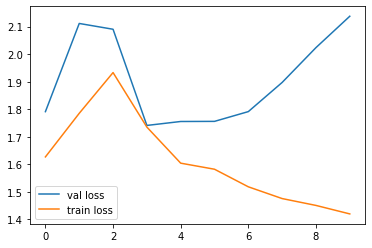

In [51]:
import matplotlib.pyplot as plt
epoch=[i for i in range(10)]
fig,ax=plt.subplots()
print(epoch)
loss_list_val1 = list(map(lambda x :x/len(val_ids), loss_list_val))
loss_list_train1 = list(map(lambda x :x/len(train_ids), loss_list_train))
ax.plot(epoch,loss_list_val1,label="val loss")
ax.plot(epoch,loss_list_train1,label="train loss")
plt.savefig("end2end_sentimentlex_loss_lre-7.png")
ax.legend() 

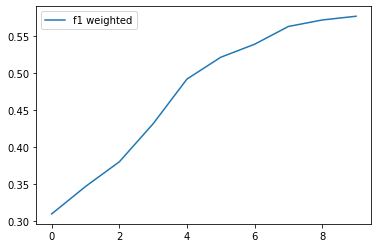

In [41]:
fig,ax2=plt.subplots()
ax2.plot(epoch,f1_list,label="f1 weighted")
# ax2.plot(epoch,loss_list_train,label="train loss")
ax2.legend()
plt.savefig("end2end_sentimentlex_f1_lre-7.png")

In [42]:
def test(model):
    model.eval()
    preds_test=[]
    with torch.no_grad():
        for i,(ids,mask) in tqdm_notebook(enumerate(zip(test_ids,test_mask)),total=len(test_ids)):
            ids,mask=ids.to(device),mask.to(device)
#             print(type(ids))
            speaker_list=speaker_list_test[i].to(device)
            logits=model(ids,mask,speaker_list)
            logits=torch.unsqueeze(logits,0)
            pred=logits.detach().cpu().numpy()
#             print(pred)
            pred=np.argmax(pred,axis=1)
            preds_test.append(pred)
#     loss_list_val.append(loss_tot)
    print("val score")
    accuracy=accuracy_score(test_labels.tolist(),preds_test)
    f1=f1_score(test_labels.tolist(),preds_test,average="weighted")
    print("accuracy=",accuracy,"f1=",f1)

In [49]:
best_model=bert_GCN(bert,1024,1024,7)
best_model.to(device)
best_model=torch.load("last_model_end2end_with_scheduler.pt")

In [50]:
test(best_model)

  0%|          | 0/2610 [00:00<?, ?it/s]




val score
accuracy= 0.6260536398467433 f1= 0.6119159319522116


In [ ]:
# class GCN(nn.Module):
#     def __init__(self,in_f,o_f,num_label):
#         super().__init__()
#         self.conv1=GraphConv(in_f,o_f)
#         self.conv2=GraphConv(in_f,o_f)
# #         self.conv3=GraphConv(in_f,o_f)
# #         self.conv4=GraphConv(in_f,o_f)
#         self.fc1=nn.Linear(2*o_f,num_label)
        
#     def forward(self,g,in_f):
#         h=self.conv1(g,in_f)
#         h=F.relu(h)
#         h=self.conv2(g,h)
#         h=F.relu(h)
# #         h=self.conv3(g,h)
# #         h=F.relu(h)
# #         h=self.conv4(g,h)
# #         h=F.relu(h)
#         h=self.fc1(torch.cat((in_f,h) ,dim=-1))[3]
# #         h=F.softmax(h,dim=1)
        
#         return h
        
        
        

In [ ]:
pirnt alsnaf

In [ ]:
graphs=[]
# u,v=torch.tensor([0,1,2]),torch.tensor([1,2,3])
# g=dgl.graph((u,v))
# g.ndata["emb"]=train_embed[:g.num_nodes()]
# print(g.device)
for i,e in enumerate(train_embed):
    if i>= (3):
        
#         u,v=torch.tensor([0,1,2]),torch.tensor([1,2,3])
        u,v=[0,1,2],[1,2,3]
#         k=[0,1,2,3,4,5]
        speakers=train_speaker[i-3:i+1]
#         print(speakers)
        speakers=speakers.tolist()
        text=train_text[i-3:i+1]
        emb=[]
        loca=[]
        for loc,txt in enumerate(text):
            if senti_word_emb(txt)!=None:
                emb.append(senti_word_emb(txt).tolist())
                loca.append(loc)
#                 print(txt)
        print("lcoa before pop",loca)
        print("speakers before pop",speakers)
#         temp=loca.copy()
#         remove_index=[]
        for j,z in reversed(list(enumerate(loca))):
            if isinstance(speakers[z],str):         
                print("j",j)                               #reverse before poppong for correct index
#                 remove_index.append(j)
                loca.pop(j)
                emb.pop(j)
        
        print("loca afer pop",loca)
#         print(speakers)
        k=[]
        speaker_node=[]
        for idx in range(3+1):
            if isinstance(speakers[idx],int):
                k.append(idx)
                speaker_node.append(speakers[idx])
        print("before k spnode",k,speaker_node)
    
        unique_speaker_nodes=set(speaker_node)
        
        
        speaker_emb=torch.zeros(len(unique_speaker_nodes),1024)
        
        for ix,xd in enumerate(unique_speaker_nodes):
            torch.manual_seed(xd)
            speaker_emb[ix]=torch.rand(1024)
        

        
        
#         print(speaker_emb)
        
        
        for z,l in enumerate(speaker_node):
            for ind,m in enumerate(unique_speaker_nodes):
                if l==m:
                    speaker_node[z]=4+ind   
                    
       
        unique_words=len(loca)
        if len(speaker_node)!=0:
            last_node=max(speaker_node)
        else:
            last_node=3
#         print("leastnode",last_node)
        word_nodes=[]
        if len(loca)!=0:
            for z in range(len(loca)):
                
                word_nodes.append(last_node+z+1)
        
        print("word?nodes",word_nodes)
            
        word_to_utt=loca
        word_to_speaker=[]
        speaker_to_word=word_nodes
        
        print("speaker_node",speaker_node)
        print("loca",loca)
        print("w2s",word_to_speaker)
            
        print()
        for j,z in enumerate(loca):
            word_to_speaker.append(speaker_node[k.index(z)])
            
        in_feat=train_embed[i-3:i+1]
        if len(unique_speaker_nodes)!=0:
                
                emb=torch.tensor(emb)
#                 print(emb.shape)
#                 k=torch.tensor(k)
#                 speaker_node=torch.tensor(speaker_node)
#                 word_nodes=torch.tensor(word_nodes)
#                 word_to_utt=torch.tensor(word_to_utt)
#                 word_to_speaker=torch.tensor(word_to_speaker)
#                 speaker_to_word=torch.tensor(speaker_to_word)
                u=u+k+word_to_utt+word_to_speaker
                v=v+speaker_node+word_nodes+speaker_to_word
#                 u=(torch.cat((u,k,word_to_utt,word_to_speaker),0))
#                 v=(torch.cat((v,speaker_node,word_nodes,speaker_to_word),0))
                in_feat=torch.cat((train_embed[i-3:i+1],speaker_emb,emb),0)
        print("speaker",k)
        print("now",u,v)
            
#         for idx,sp in enumerate(speakers):
#             if isinstance(sp,str):
#                 print(idx)
#                 k.pop(idx)
#                 speakers.pop(idx)
#         print("ag¥frt",speakers,k)
#         speakers=train_speaker[i-5:i+1]
#         print(speakers)
#         speakers=speakers.unique()
#         print(speakers)
#         main_speakers=[e for e in speakers if isinstance(e,int)]  
#         for e in main_speakers:
#             print(e)
#         print(train_embed[i-5:i+1])
        print(i)
        if i==16:
            print(u,v,in_feat.shape)
            print("loca",loca)
            print("w2s",word_to_speaker)
            print(speaker_node)
            print()
        g=dgl.graph((u,v))
#         print(in_feat) 
        bg=dgl.to_bidirected(g)
        bg.ndata["emb"]=in_feat
        print(bg.ndata["emb"])
        
#         print(in_feat.shape)
        
        
        graphs.append(bg)
    
#     if i==4:
#         u,v=torch.tensor([0,1,2,3]),torch.tensor([1,2,3,4])
#         g=dgl.graph((u,v))
#         g.ndata["emb"]=train_embed[0:5]
#         graphs.append(g)
    
#     if i==3:
#         u,v=torch.tensor([0,1,2]),torch.tensor([1,2,3])
#         g=dgl.graph((u,v))
#         g.ndata["emb"]=train_embed[0:4]
#         graphs.append(g)
        
#     if i==2:
#         u,v=torch.tensor([0,1]),torch.tensor([1,2])
#         g=dgl.graph((u,v))
#         g.ndata["emb"]=train_embed[0:3]
#         graphs.append(g)
#     if i==1:
#         u,v=torch.tensor([0]),torch.tensor([1])
#         g=dgl.graph((u,v))
#         g.ndata["emb"]=train_embed[0:2]
#         graphs.append(g)
#     if i==0:
#         u,v=torch.tensor([0]),torch.tensor([0])
#         g=dgl.graph((u,v),num_nodes=1)
#         g.ndata["emb"]=torch.tensor([train_embed[0]])

In [ ]:
for i in range(1):
    print("mc")

In [ ]:
print(len(graphs))
print(graphs[7],graphs[2].ndata["emb"])
# torch.manual_seed(1)
# a=torch.rand(2)
# torch.manual_seed(1)
# b=torch.rand(2)
# f=[train_embed[0]]
# f=[*range(0,2,1)]
# print(len(f))

In [ ]:
graphs_val=[]

# u,v=torch.tensor([0,1,2]),torch.tensor([1,2,3])
# g=dgl.graph((u,v))
# g.ndata["emb"]=train_embed[:g.num_nodes()]
# print(g.device)
for i,e in enumerate(val_embed):
    if i>= (3):
        
#         u,v=torch.tensor([0,1,2]),torch.tensor([1,2,3])
        u,v=[0,1,2],[1,2,3]
#         k=[0,1,2,3,4,5]
        speakers=val_speaker[i-3:i+1]
#         print(speakers)
        speakers=speakers.tolist()
        text=val_text[i-3:i+1]
        emb=[]
        loca=[]
        for loc,txt in enumerate(text):
            if senti_word_emb(txt)!=None:
                emb.append(senti_word_emb(txt).tolist())
                loca.append(loc)
#                 print(txt)
        print("lcoa before pop",loca)
        print("speakers before pop",speakers)
#         temp=loca.copy()
#         remove_index=[]
        for j,z in reversed(list(enumerate(loca))):
            if isinstance(speakers[z],str):         
                print("j",j)                               #reverse before poppong for correct index
#                 remove_index.append(j)
                loca.pop(j)
                emb.pop(j)
        
        print("loca afer pop",loca)
#         print(speakers)
        k=[]
        speaker_node=[]
        for idx in range(3+1):
            if isinstance(speakers[idx],int):
                k.append(idx)
                speaker_node.append(speakers[idx])
        print("before k spnode",k,speaker_node)
    
        unique_speaker_nodes=set(speaker_node)
        
        
        speaker_emb=torch.zeros(len(unique_speaker_nodes),1024)
        
        for ix,xd in enumerate(unique_speaker_nodes):
            torch.manual_seed(xd)
            speaker_emb[ix]=torch.rand(1024)
        

        
        
#         print(speaker_emb)
        
        
        for z,l in enumerate(speaker_node):
            for ind,m in enumerate(unique_speaker_nodes):
                if l==m:
                    speaker_node[z]=4+ind   
                    
       
        unique_words=len(loca)
        if len(speaker_node)!=0:
            last_node=max(speaker_node)
        else:
            last_node=3
#         print("leastnode",last_node)
        word_nodes=[]
        if len(loca)!=0:
            for z in range(len(loca)):
                
                word_nodes.append(last_node+z+1)
        
        print("word?nodes",word_nodes)
            
        word_to_utt=loca
        word_to_speaker=[]
        speaker_to_word=word_nodes
        
        print("speaker_node",speaker_node)
        print("loca",loca)
        print("w2s",word_to_speaker)
            
        print()
        for j,z in enumerate(loca):
            word_to_speaker.append(speaker_node[k.index(z)])
            
        in_feat=val_embed[i-3:i+1]
        if len(unique_speaker_nodes)!=0:
                
                emb=torch.tensor(emb)
#                 print(emb.shape)
#                 k=torch.tensor(k)
#                 speaker_node=torch.tensor(speaker_node)
#                 word_nodes=torch.tensor(word_nodes)
#                 word_to_utt=torch.tensor(word_to_utt)
#                 word_to_speaker=torch.tensor(word_to_speaker)
#                 speaker_to_word=torch.tensor(speaker_to_word)
                u=u+k+word_to_utt+word_to_speaker
                v=v+speaker_node+word_nodes+speaker_to_word
#                 u=(torch.cat((u,k,word_to_utt,word_to_speaker),0))
#                 v=(torch.cat((v,speaker_node,word_nodes,speaker_to_word),0))
                in_feat=torch.cat((val_embed[i-3:i+1],speaker_emb,emb),0)
        print("speaker",k)
        print("now",u,v)
            
#         for idx,sp in enumerate(speakers):
#             if isinstance(sp,str):
#                 print(idx)
#                 k.pop(idx)
#                 speakers.pop(idx)
#         print("ag¥frt",speakers,k)
#         speakers=train_speaker[i-5:i+1]
#         print(speakers)
#         speakers=speakers.unique()
#         print(speakers)
#         main_speakers=[e for e in speakers if isinstance(e,int)]  
#         for e in main_speakers:
#             print(e)
#         print(train_embed[i-5:i+1])
        print(i)
        if i==16:
            print(u,v,in_feat.shape)
            print("loca",loca)
            print("w2s",word_to_speaker)
            print(speaker_node)
            print()
        g=dgl.graph((u,v))
#         print(in_feat) 
        bg=dgl.to_bidirected(g)
        bg.ndata["emb"]=in_feat
        print(bg.ndata["emb"])
        
#         print(in_feat.shape)
        
        
        graphs_val.append(bg)

In [ ]:
print(len(val_embed))
print(len(graphs_val))


In [ ]:
model=GCN(1024,1024,7)
model=model.to(device)
opt = torch.optim.Adam(model.parameters())
print(device)

In [ ]:

train_label=train_df["Emotion"]
print(train_label)
train_label=torch.tensor(train_label.tolist())
train_label=train_label[3:].to(device)
print(train_label.shape)
print(train_label)

In [ ]:
val_labels=val_df["Emotion"]
# val_labels=val_labels.to(device)
print(val_label)
val_labels=torch.tensor(val_labels.tolist()).to(device)
val_labels=val_labels[3:]
print(next(model.parameters()).is_cuda)
print(val_labels.shape)

In [ ]:
# val_labels=val_labels.tolist()

def validate(model):
    model.eval()
    preds_val=[]
#     model=model.to("cpu")
    loss_tot=0
    with torch.no_grad():
        for i,graph in tqdm_notebook(enumerate(graphs_val),total=len(graphs_val)):
        
            node_features=graph.ndata["emb"]
            node_features=node_features.to(device)
            graph=dgl.add_self_loop(graph)
            graph=graph.to(device)
#         graph=graph.to("cpu")
#             print(graph.device,node_features.device)
            
            logits = model(graph, node_features)
            logits=torch.unsqueeze(logits,0)
            label=torch.unsqueeze(val_labels[i],0)
            loss=loss_fn(logits,label)
            loss_tot+=loss.item()
            pred=logits.detach().cpu().numpy()
#             print(pred)
            pred=np.argmax(pred,axis=1)
            preds_val.append(pred)
#     loss_list_val.append(loss_tot)
    print("val score")
    accuracy=accuracy_score(val_labels.tolist(),preds_val)
    f1=f1_score(val_labels.tolist(),preds_val,average="weighted")
    print("accuracy=",accuracy,"f1=",f1)
    return loss_tot,accuracy,f1
            
        
        
    
    

In [ ]:
import torch.nn.functional as F
import torch
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
# torch.set_default_tensor_type('torch.cuda.FloatTensor')
loss_fn = nn.CrossEntropyLoss()
loss_tot=0
best_f1=0
loss_list_val=[]
loss_list_train=[]
f1_list=[]
flag=0
# train_label=train_label.to(device)

# print(next(model.parameters()).is_cuda)
for epoch in range(200):
    loss_tot=0
    print("="*30,"epoch",epoch,"="*30)
    for i,graph in tqdm_notebook(enumerate(graphs),total=len(graphs)):
        
        model.train()
        node_features=graph.ndata["emb"]
        graph=dgl.add_self_loop(graph)
        graph=graph.to(device)
        node_features=node_features.to(device)
        logits = model(graph, node_features)
        
        logits=torch.unsqueeze(logits,0)
        label=torch.unsqueeze(train_label[i],0)
#         print(logits.is_cuda,label.is_cuda)
        loss=loss_fn(logits,label)
        print(loss)
        loss_tot+=loss.item()
        opt.zero_grad()
        loss.backward()
        opt.step()
        
    print(loss_tot,epoch)
    loss_val,accuracy,f1=validate(model)
    if f1>best_f1:
        best_f1=f1
        flag=epoch
        torch.save(model,"best_model.pt")
    torch.save(model,"last_model.pt")
    loss_list_val.append(loss_val)
    loss_list_train.append(loss_tot)
    f1_list.append(f1)
print("best f1={} in epoch={}".format(best_f1,flag))
    
    
# graph = dgl.add_self_loop(graphs[1])
# loss = F.cross_entropy(logits, train_label[i])
# logits = model(graph, graph.ndata["emb"])
# print()

In [ ]:
print(pred)

In [ ]:
print(device)

In [ ]:
print(logits)


In [ ]:
# logits = torch.unsqueeze(logits,0)
print(logits.shape)

In [ ]:
# x=torch.unsqueeze(train_label[1],0)
# print(x.shape)
# print(loss_fn(logits, x))
# print(train_label[9].shape)
print(len(test_embed))
# test_embed=test_embed[1:]
# print(train_label[9].shape)

test_embed=test_embed.to("cpu")
print((test_embed[0].is_cuda))

In [ ]:
graphs_test=[]
# u,v=torch.tensor([0,1,2]),torch.tensor([1,2,3])
# g=dgl.graph((u,v))
# g.ndata["emb"]=train_embed[:g.num_nodes()]
# print(g.device)

for i,e in enumerate(test_embed):
    if i>= (3):
        
#         u,v=torch.tensor([0,1,2]),torch.tensor([1,2,3])
        u,v=[0,1,2],[1,2,3]
#         k=[0,1,2,3,4,5]
        speakers=test_speaker[i-3:i+1]
#         print(speakers)
        speakers=speakers.tolist()
        text=test_text[i-3:i+1]
        emb=[]
        loca=[]
        for loc,txt in enumerate(text):
            if senti_word_emb(txt)!=None:
                emb.append(senti_word_emb(txt).tolist())
                loca.append(loc)
#                 print(txt)
        print("lcoa before pop",loca)
        print("speakers before pop",speakers)
#         temp=loca.copy()
#         remove_index=[]
        for j,z in reversed(list(enumerate(loca))):
            if isinstance(speakers[z],str):         
                print("j",j)                               #reverse before poppong for correct index
#                 remove_index.append(j)
                loca.pop(j)
                emb.pop(j)
        
        print("loca afer pop",loca)
#         print(speakers)
        k=[]
        speaker_node=[]
        for idx in range(3+1):
            if isinstance(speakers[idx],int):
                k.append(idx)
                speaker_node.append(speakers[idx])
        print("before k spnode",k,speaker_node)
    
        unique_speaker_nodes=set(speaker_node)
        
        
        speaker_emb=torch.zeros(len(unique_speaker_nodes),1024)
        
        for ix,xd in enumerate(unique_speaker_nodes):
            torch.manual_seed(xd)
            speaker_emb[ix]=torch.rand(1024)
        

        
        
#         print(speaker_emb)
        
        
        for z,l in enumerate(speaker_node):
            for ind,m in enumerate(unique_speaker_nodes):
                if l==m:
                    speaker_node[z]=4+ind   
                    
       
        unique_words=len(loca)
        if len(speaker_node)!=0:
            last_node=max(speaker_node)
        else:
            last_node=3
#         print("leastnode",last_node)
        word_nodes=[]
        if len(loca)!=0:
            for z in range(len(loca)):
                
                word_nodes.append(last_node+z+1)
        
        print("word?nodes",word_nodes)
            
        word_to_utt=loca
        word_to_speaker=[]
        speaker_to_word=word_nodes
        
        print("speaker_node",speaker_node)
        print("loca",loca)
        print("w2s",word_to_speaker)
            
        print()
        for j,z in enumerate(loca):
            word_to_speaker.append(speaker_node[k.index(z)])
            
        in_feat=test_embed[i-3:i+1].to("cpu")
        if len(unique_speaker_nodes)!=0:
                
                emb=torch.tensor(emb).to("cpu")
                speaker_emb=speaker_emb.to("cpu")
#                 print(emb.shape)
#                 k=torch.tensor(k)
#                 speaker_node=torch.tensor(speaker_node)
#                 word_nodes=torch.tensor(word_nodes)
#                 word_to_utt=torch.tensor(word_to_utt)
#                 word_to_speaker=torch.tensor(word_to_speaker)
#                 speaker_to_word=torch.tensor(speaker_to_word)
                u=u+k+word_to_utt+word_to_speaker
                v=v+speaker_node+word_nodes+speaker_to_word
#                 u=(torch.cat((u,k,word_to_utt,word_to_speaker),0))
#                 v=(torch.cat((v,speaker_node,word_nodes,speaker_to_word),0))
                print(test_embed[i-3:i+1].is_cuda,speaker_emb.is_cuda,emb.is_cuda)
                in_feat=torch.cat((test_embed[i-3:i+1].to("cpu"),speaker_emb,emb),0).to("cpu")
        print("speaker",k)
        print("now",u,v)
            
#         for idx,sp in enumerate(speakers):
#             if isinstance(sp,str):
#                 print(idx)
#                 k.pop(idx)
#                 speakers.pop(idx)
#         print("ag¥frt",speakers,k)
#         speakers=train_speaker[i-5:i+1]
#         print(speakers)
#         speakers=speakers.unique()
#         print(speakers)
#         main_speakers=[e for e in speakers if isinstance(e,int)]  
#         for e in main_speakers:
#             print(e)
#         print(train_embed[i-5:i+1])
        print(i)
        if i==16:
            print(u,v,in_feat.shape)
            print("loca",loca)
            print("w2s",word_to_speaker)
            print(speaker_node)
            print()
        g=dgl.graph((u,v))
#         g=g.to(device)
#         print(in_feat) 
        g=g.to("cpu")
        bg=dgl.to_bidirected(g)
        bg.ndata["emb"]=in_feat
        
        graphs_test.append(bg)
    
#     if i==4:
#         u,v=torch.tensor([0,1,2,3]),torch.tensor([1,2,3,4])
#         g=dgl.graph((u,v))
#         g.ndata["emb"]=test_embed[0:5]
#         graphs_test.append(g)
        
#     if i==3:
#         u,v=torch.tensor([0,1,2]),torch.tensor([1,2,3])
#         g=dgl.graph((u,v))
#         g.ndata["emb"]=test_embed[0:4]
#         graphs_test.append(g)
#     if i==2:
#         u,v=torch.tensor([0,1]),torch.tensor([1,2])
#         g=dgl.graph((u,v))
#         g.ndata["emb"]=test_embed[0:3]
#         graphs_test.append(g)
#     if i==1:
#         u,v=torch.tensor([0]),torch.tensor([1])
#         g=dgl.graph((u,v))
#         g.ndata["emb"]=test_embed[0:2]
#         graphs_test.append(g)

In [ ]:
model_best=GCN(1024,1024,7)
model_best=torch.load("best_model_epoch180.pt")
model_best=model_best.to("cpu")

In [ ]:
model_best.eval()
preds=[]
# model=model.to("cpu")
print(model_best)
with torch.no_grad():
    for i,graph in tqdm_notebook(enumerate(graphs_test),total=len(graphs_test)):
        

        node_features=graph.ndata["emb"]
        node_feateure=node_features.to(device)
        graph=dgl.add_self_loop(graph)
        graph=graph.to("cpu")
        print(graph.device,node_features.device)
        
        logits = model_best(graph, node_features)
        logits=torch.unsqueeze(logits,0)
        pred=logits.detach().cpu().numpy()
        print(pred)
        pred=np.argmax(pred,axis=1)
        preds.append(pred)
        
    

In [ ]:
# graph=graphs_test[1]
# node_features=graph.ndata["emb"]
# graph=dgl.add_self_loop(graph)
# logits = model(graph, node_features)
# logits=torch.unsqueeze(logits,0)
# pred=logits.detach().cpu().numpy()
# print(pred)
# pred=np.argmax(pred,axis=1)
# print(pred)
print(len(preds))

In [ ]:
# len(preds)
test_labels=torch.tensor(test_df["Emotion"].tolist())
test_labels=test_labels[3:]
print(len(test_labels))
print(test_labels)

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
print("acc=",accuracy_score(test_labels.tolist(),preds))
# print(classification_report(test_label, preds))
print("f1 score", f1_score(test_labels.tolist(),preds,average="weighted"))

In [ ]:
import matplotlib.pyplot as plt
epoch=[i for i in range(200)]
print(epoch)
fig,ax=plt.subplots()



In [ ]:
fig,ax=plt.subplots()

loss_list_val = list(map(lambda x :x/len(val_embed), loss_list_val))
loss_list_train = list(map(lambda x :x/len(train_embed), loss_list_train))
loss_valid=list(loss_list_val[i] for i in range(1,len(loss_list_val),2))
ax.plot(epoch,loss_valid,label="val loss")
ax.plot(epoch,loss_list_train,label="train loss")
ax.legend() 
